In [120]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [121]:
#This function checks the validity of float,it is specifically used for the various float columns to check if the strings are
#valid floating point strings
def isFloat(s):
    if re.match("^\d+\.\d+$", s) is None:
        if re.match("^\d+",s) is None:
            return False
        else:
            return True
    return True

In [214]:
#This function visualizes boxplots
def BoxPlot(churn_dataset_filtered_train,attributes):
    for attribute in attributes:
        cf = churn_dataset_filtered_train[~churn_dataset_filtered_train[attribute].isna()]
        churned_std_og_t2t = cf[cf['churn'] ==1]
        nonchurned_std_og_t2t = cf[cf['churn'] ==0]
        plt.boxplot(churned_std_og_t2t[attribute])
        plt.show()
        print(np.median(churned_std_og_t2t[attribute]))
        print(np.mean(churned_std_og_t2t[attribute]))
        plt.boxplot(nonchurned_std_og_t2t[attribute])
        plt.show()
        print(np.median(nonchurned_std_og_t2t[attribute]))
        print(np.mean(nonchurned_std_og_t2t[attribute]))

In [122]:
#This function imputes with the median
def ImputeMedian(churn_dataset_filtered_train,attributes):
    for attribute in attributes:
        cf = churn_dataset_filtered_train[~churn_dataset_filtered_train[attribute].isna()]
        notna_notchurn_loc_og_t2m_mou = cf[(cf['churn']==0)]
        notna_churn_loc_og_t2m_mou = cf[(cf['churn']==1)]
        churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_churn_loc_og_t2m_mou[attribute])
        churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_notchurn_loc_og_t2m_mou[attribute])
        cf2 = churn_dataset_filtered_train[attribute]
        churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train[attribute]<np.percentile(list(cf2),98.5)]
    return churn_dataset_filtered_train

In [123]:
telecom_churn_data = pd.read_csv('telecom_churn_data.csv')

In [124]:
telecom_churn_data.shape

(99999, 226)

In [125]:
len(telecom_churn_data['mobile_number'].unique())

99999

The data set has 99999 rows and the number of unique mobile number is too 99999 hence each row corresponds to a unique mobile number

The next step to do would be identify the data of interest,the high value customers ,so for that lets look at total_rech_amt_6 and total_rech_amt_7

In [126]:
print(sum(telecom_churn_data['total_rech_amt_6'].isna()))
print(sum(telecom_churn_data['total_rech_amt_7'].isna()))
print(sum(telecom_churn_data['total_rech_num_7'].isna()))
print(sum(telecom_churn_data['total_rech_num_6'].isna()))

0
0
0
0


In [127]:
filter_amt_6 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_amt_6']))
filter_amt_7 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_amt_7']))
filter_rech_6 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_num_6']))
filter_rech_7 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_num_7']))

In [128]:
#len(filter_amt_6.to_list())
print(len(filter_amt_6))
print(len(filter_amt_7))
print(len(filter_rech_6))
print(len(filter_rech_7))

99999
99999
99999
99999


None of the columns pertaining to recharge amounts of first 2 months and none of the columns pertaining to number of times recharged have values other than floating point and all of them have 99999 values in total with no nan values.Hence data quality is verified 

In [129]:
#telecom_churn_data['avg_recharge_amt'] = telecom_churn_data.apply(lambda row:((telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])),axis =1)
telecom_churn_data['avg_recharge_amt'] = 0

In [130]:
zeros_data = telecom_churn_data[(telecom_churn_data['total_rech_num_6'] ==0) & (telecom_churn_data['total_rech_num_7'] ==0)]
zeros_data.shape

(185, 227)

In [131]:
print(sum(zeros_data['total_rech_amt_7']>0))
print(sum(zeros_data['total_rech_amt_6']>0))

0
0


In [132]:
#telecom_churn_data['avg_recharge_amt'] = telecom_churn_data.apply(lambda row:((telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])),axis =1)
telecom_churn_data['avg_recharge_amt'] = (telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])
telecom_churn_data.loc[telecom_churn_data['avg_recharge_amt'].isna(),['avg_recharge_amt'] ] =0

In [133]:
sum(telecom_churn_data['avg_recharge_amt'].isna())

0

In [134]:
telecom_churn_data['avg_recharge_amt'].head()
telecom_churn_data['avg_recharge_amt'].shape

(99999,)

In [135]:
np.percentile(list(telecom_churn_data['avg_recharge_amt']),70)

56.333333333333336

In [136]:
high_value_customers = telecom_churn_data[telecom_churn_data['avg_recharge_amt']>np.percentile(list(telecom_churn_data['avg_recharge_amt']),70)]

In [137]:
high_value_customers.shape

(29975, 227)

In [138]:
high_value_customers['churn'] = 0

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
high_value_customers.loc[((high_value_customers['total_ic_mou_9']==0)&(high_value_customers['total_og_mou_9']==0)&(high_value_customers['vol_2g_mb_9']==0)&(high_value_customers['vol_3g_mb_9']==0)),['churn']] = 1

In [140]:
sum(high_value_customers['churn'])

2607

In [141]:
high_value_customers.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_recharge_amt', 'churn'],
      dtype='object', length=228)

Drop off all the columns ending with _9 after identifying churners.

In [142]:
cols = list(filter( lambda x: ("_9" not in x) ,high_value_customers.columns))

In [143]:
churn_dataset = high_value_customers[cols]

In [144]:
churn_dataset.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,87.714286,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,237.000000,1
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,NaN,1.0,NaN,902,0.00,0.00,0.00,0.00,69.166667,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.00,76.000000,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.00,57.375000,0


In [145]:
churn_dataset.to_csv('churndataset.csv')

PermissionError: [Errno 13] Permission denied: 'churndataset.csv'

In [ ]:
churn_dataset['circle_id'].unique()

We can eliminate certain columns like date of last recharge,last recharge of data ,last date ,mobile number.As seve on use on business value,afterall the amount of recharge matters.

In [ ]:
churn_dataset = churn_dataset.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_6'],axis = 1)

In [ ]:
churn_dataset = churn_dataset.drop(['mobile_number'],axis = 1)

In [ ]:
len(churn_dataset.columns)

In [ ]:
backup_data_frame = churn_dataset

In [ ]:
churn_dataset = backup_data_frame

First lets consider attributes which could possibly be useful in determining churn.


In [146]:
#The columns with arpu can be dropped as the revenue could be in way determined by recharge amount,so lets drop the columns with arpu
newcols = list(filter(lambda x:('arpu' not in x), list(churn_dataset.columns)))
churn_dataset_filtered = churn_dataset[newcols]

In [147]:
churn_dataset_filtered = churn_dataset[newcols]

In [148]:
#print(newcols)
len(churn_dataset_filtered.columns)

165

In [149]:
#Lets consider the categories of attributes one by one.
#Firstly lets consider local calls
#1.local calls outgoing to other operator fixed line
sum(churn_dataset_filtered['loc_og_t2o_mou'].isna())

515

In [150]:
cf = churn_dataset_filtered[~churn_dataset_filtered['loc_og_t2o_mou'].isna()]
cf['loc_og_t2o_mou'].mean()

0.0

In [151]:
#Since all the values are zero in it,it does not serve any meaningful info for regression,so drop it.Since the number of 
#minutes cannot be negative,hence all non null values are zero
churn_dataset_filtered_1 = churn_dataset_filtered.drop(['loc_og_t2o_mou'],axis = 1)

In [152]:
cf = churn_dataset_filtered_1[~churn_dataset_filtered_1['std_og_t2o_mou'].isna()]
cf['std_og_t2o_mou'].mean()

0.0

In [153]:
#Since all the non null values are zero again it does not serve any meaningful infromation for regression.It can be dropped.Since the number of 
#minutes cannot be negative,hence all non null values are zero
churn_dataset_filtered_2 = churn_dataset_filtered_1.drop(['std_og_t2o_mou'],axis = 1)

In [154]:
#The same goes with loc_ic_t2o_mou as well
cf = churn_dataset_filtered_2[~churn_dataset_filtered_2['loc_ic_t2o_mou'].isna()]
cf['loc_ic_t2o_mou'].mean()

0.0

In [155]:
churn_dataset_filtered_3 = churn_dataset_filtered_2.drop(['loc_ic_t2o_mou'],axis = 1)

So far we have just dropped certain columns,now it is ideal to split the data into train and test,before imputing the values or checking the distributions as test data should ideally be unseen. 

In [156]:
churn_dataset_filtered_train,churn_dataset_filtered_test=train_test_split(churn_dataset_filtered_3,train_size=0.7,test_size=0.3,random_state=100)

In [157]:
print(churn_dataset_filtered_train.shape)
print(churn_dataset_filtered_test.shape)

(20982, 162)
(8993, 162)


In [158]:
#The same goes with loc_ic_t2o_mou as well
cf = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
print(cf.shape)
#cf['loc_ic_t2o_mou'].mean()

(694, 162)


In [159]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
cf['loc_og_t2t_mou_6'].mean()

83.61968257097632

{'whiskers': [<matplotlib.lines.Line2D at 0xcd151e2fc8>,
 'caps': [<matplotlib.lines.Line2D at 0xcd151e6b48>,
 'boxes': [<matplotlib.lines.Line2D at 0xcd151e27c8>],
 'medians': [<matplotlib.lines.Line2D at 0xcd151e6cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xcd151ecb88>],
 'means': []}

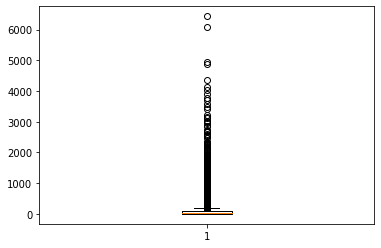

In [160]:
plt.boxplot(cf['loc_og_t2t_mou_6'])

In [161]:
#There is of course skewness in the data.However lets check the distribution of churn and not churn in this dataset.
#cf.groupby('churn')['onnet_mou_6'].count()
print(cf.shape)
sum(cf['churn'])
#1523 have churned

(20288, 162)


1521

15.09

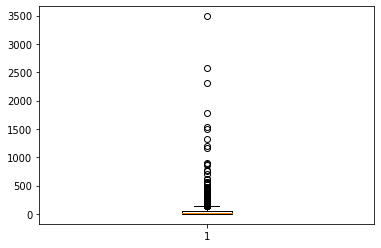

In [162]:
churned_nonna_loc_og_t2t_mou_6 = cf[cf['churn'] ==1]
plt.boxplot(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])
np.median(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])

31.56

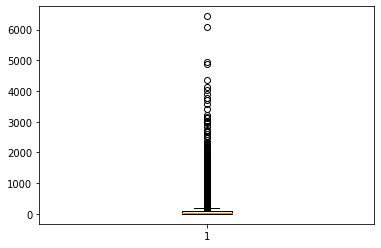

In [163]:
churned_nonna_loc_og_t2t_mou_6 = cf[cf['churn'] ==0]
plt.boxplot(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])
np.median(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])

In [164]:
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
#print(cf2.groupby('churn')['onnet_mou_6'].count())
print(cf2.shape)
sum(cf2['churn'])
#Here 320 have churned which is considerable quite large when the dataset is imbalanced ,we must consider
#imputing these values.

(694, 162)


333

In [165]:
#impute the values of na's with their respective medians of groups of churned and unchurned
#churn_dataset_filtered_train

churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna())),['loc_og_t2t_mou_6']] =15.09
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna())),['loc_og_t2t_mou_6']] =30.79



C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [166]:
#The outlier treatment ,since the dataset is small lets take 1.5 % of extreme values

In [167]:
cf = churn_dataset_filtered_train['loc_og_t2t_mou_6']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

659.0243499999997
0.0


In [168]:
churn_dataset_filtered_train.shape
churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6']<np.percentile(list(cf),98.5)]
churn_dataset_filtered_train.shape
#Here zero is not considered as zero extends across large range of percentiles so it cannot be considered as outlier

(20667, 162)

In [169]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna()]
cf['loc_og_t2t_mou_7'].mean()

67.0041811916298

8.05

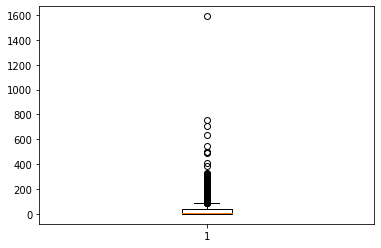

In [170]:
notna_churn_loc_og_t2t_mou_7 = cf[(cf['churn']==1)]

plt.boxplot(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])
np.median(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])

30.48

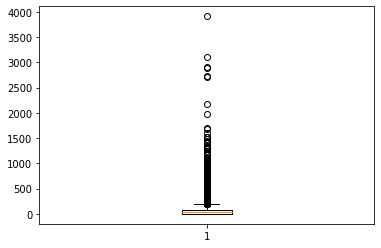

In [171]:
notna_churn_loc_og_t2t_mou_7 = cf[(cf['churn']==0)]

plt.boxplot(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])
np.median(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])

In [172]:
#Print the count churns and non churns when there are nas
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna()]
print(cf2.shape)
print(cf2[cf2['churn']==1].shape)
print(cf2[cf2['churn']==0].shape)

(644, 162)
(382, 162)
(262, 162)


In [173]:
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna())),['loc_og_t2t_mou_7']] =8.23
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna())),['loc_og_t2t_mou_7']] =29.96



In [174]:
#The same approach goes with outlier treatment too
cf = churn_dataset_filtered_train['loc_og_t2t_mou_7']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

449.31699999999887
0.0


In [175]:
churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_7']<np.percentile(list(cf),98.5)]
churn_dataset_filtered_train.shape

(20357, 162)

In [176]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna()]
cf['loc_og_t2t_mou_8'].mean()

58.74532096782609

0.02

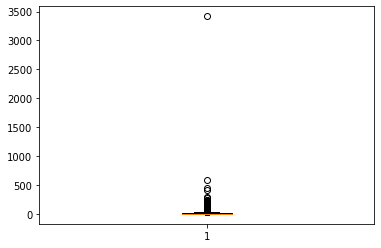

In [177]:
notna_churn_loc_og_t2t_mou_8 = cf[(cf['churn']==1)]

plt.boxplot(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])
np.median(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])

28.76

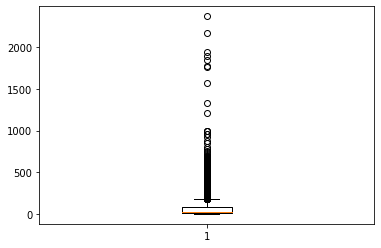

In [178]:
notna_churn_loc_og_t2t_mou_8 = cf[(cf['churn']==0)]

plt.boxplot(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])
np.median(notna_churn_loc_og_t2t_mou_8['loc_og_t2t_mou_8'])

In [179]:
#Print the count churns and non churns when there are nas
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna()]
print(cf2.shape)
print(cf2[cf2['churn']==1].shape)
print(cf2[cf2['churn']==0].shape)

(1056, 162)
(767, 162)
(289, 162)


In [180]:
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna())),['loc_og_t2t_mou_8']] =0.02
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2t_mou_8'].isna())),['loc_og_t2t_mou_8']] =28.76


In [181]:
#The same approach goes with outlier treatment too
cf = churn_dataset_filtered_train['loc_og_t2t_mou_8']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

360.65399999999994
0.0


In [182]:
churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_8']<np.percentile(list(cf),98.5)]
churn_dataset_filtered_train.shape

(20051, 162)

In [183]:
#Now lets take the next attribute log_og_t2m_mou_6 and check non na values of it
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna()]
cf['loc_og_t2m_mou_6'].mean()

155.82478795391935

44.98

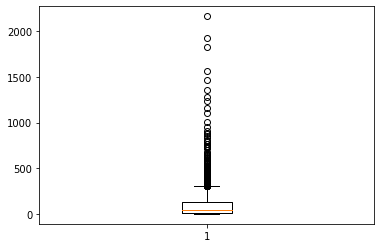

In [184]:
notna_churn_loc_og_t2m_mou_6 = cf[(cf['churn']==1)]

plt.boxplot(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])
np.median(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])

91.33

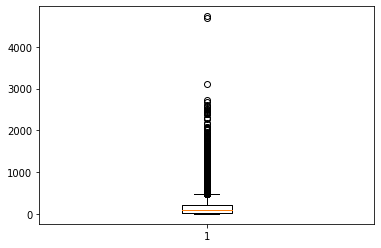

In [185]:
notna_churn_loc_og_t2m_mou_6 = cf[(cf['churn']==0)]

plt.boxplot(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])
np.median(notna_churn_loc_og_t2m_mou_6['loc_og_t2m_mou_6'])

In [186]:
#Print the count churns and non churns when there are nas
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna()]
print(cf2.shape)
print(cf2[cf2['churn']==1].shape)
print(cf2[cf2['churn']==0].shape)

(692, 162)
(333, 162)
(359, 162)


Here we see that they are almost equal the number of churns and non churns in case of nas.We can impute them respectively with
the median of their classes as the values for loc_og_t2m_mou_6 are highly skewed

In [187]:
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna())),['loc_og_t2m_mou_6']] =44.98
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2m_mou_6'].isna())),['loc_og_t2m_mou_6']] =91.33


In [188]:
#The same approach goes with outlier treatment too
cf = churn_dataset_filtered_train['loc_og_t2m_mou_6']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

858.005
0.0


In [189]:
churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2m_mou_6']<np.percentile(list(cf),98.5)]
churn_dataset_filtered_train.shape

(19750, 162)

In [190]:
#Since there are many attributes we can repeat the process iteratively for all of them in a loop
attributes = ['loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8']
for attribute in attributes:
    cf = churn_dataset_filtered_train[~churn_dataset_filtered_train[attribute].isna()]
    notna_notchurn_loc_og_t2m_mou = cf[(cf['churn']==0)]
    notna_churn_loc_og_t2m_mou = cf[(cf['churn']==1)]
    churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_churn_loc_og_t2m_mou[attribute])
    churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train[attribute].isna())),[attribute]]=np.median(notna_notchurn_loc_og_t2m_mou[attribute])
    cf2 = churn_dataset_filtered_train[attribute]
    churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train[attribute]<np.percentile(list(cf2),98.5)]

0.0
0.0


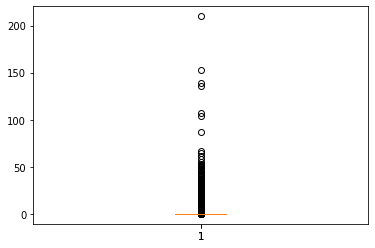

In [191]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2c_mou_6'].isna()]
notna_notchurn_loc_og_t2c_mou = cf[(cf['churn']==0)]
notna_churn_loc_og_t2c_mou = cf[(cf['churn']==1)]
plt.boxplot(notna_notchurn_loc_og_t2c_mou['loc_og_t2c_mou_6'])
print(np.median(notna_notchurn_loc_og_t2c_mou['loc_og_t2c_mou_6']))
plt.boxplot(notna_churn_loc_og_t2c_mou['loc_og_t2c_mou_6'])
print(np.median(notna_churn_loc_og_t2c_mou['loc_og_t2c_mou_6']))

In [192]:
print(np.mean(notna_notchurn_loc_og_t2c_mou['loc_og_t2c_mou_6']))
print(np.mean(notna_churn_loc_og_t2c_mou['loc_og_t2c_mou_6']))

0.9803361136855057
1.053301104972377


As we see both mean and median is more or less similar close to zero and 1 ,this column can be dropped off,however the number
of times the person makes calls to call center can be determining factor for churn as if the people are not happy with service
they frequently call the call center,we can let the model decide on this.


In [193]:
attributes = ['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']

In [194]:
#We observe that the distribution is more or less similar for other month calls to call center,hence they can be imputed similarly
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [195]:
#Further we can drop the attributes corresponding to total calls,as they are just the sum of columns corresponding to ouutgoing calls
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],axis = 1)
#churn_dataset_filtered_train['log_og_mou_6'].head()

Now we can have a look at std outgoing calls

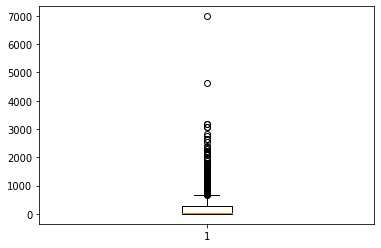

22.39


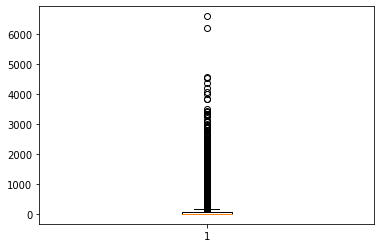

1.56


In [196]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2t_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2t_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2t_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2t_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2t_mou_6']))

This is interesting contrary to local calls the churned users have higher std usage for outgoing calls of this category.
Lets check for std calls of other categories too

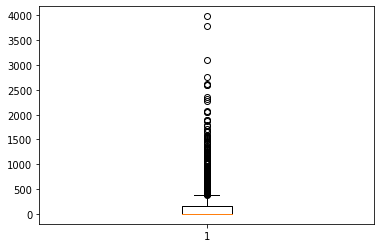

8.38


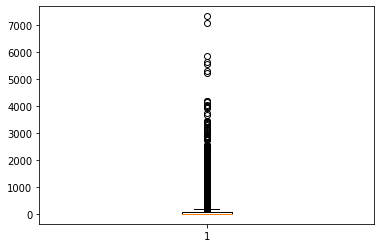

1.31


In [197]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2t_mou_7'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2t_mou_7'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2t_mou_7']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2t_mou_7'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2t_mou_7']))

Again the same is true for month 7 too.We will now impute the missing the missing values with median for all 3 categories of months 6,7,8.

In [198]:
attributes = ['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


We missed out the analysis of local mobile to fixed line.

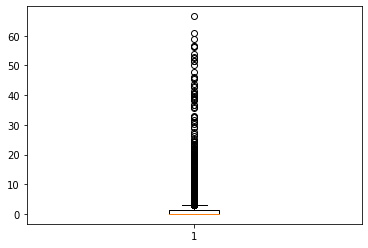

0.0


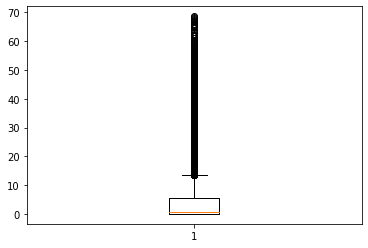

0.83


In [199]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2f_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['loc_og_t2f_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['loc_og_t2f_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['loc_og_t2f_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['loc_og_t2f_mou_6']))

In [200]:
print(np.mean(churned_std_og_t2t['loc_og_t2f_mou_6']))
print(np.mean(nonchurned_std_og_t2t['loc_og_t2f_mou_6']))

2.9430067360685883
4.858244300106117


There does not seem to be much difference in the means and medians of churns and non churns in case of local outgoing calls to same operator

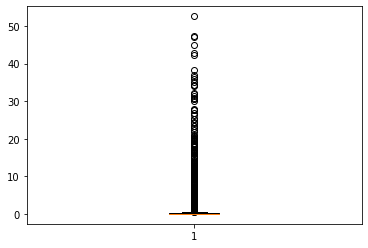

0.0


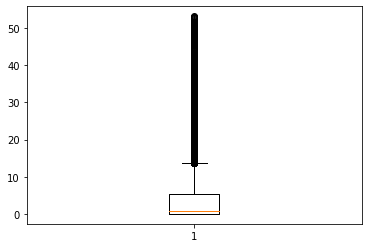

0.8


In [201]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2f_mou_7'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['loc_og_t2f_mou_7'])
plt.show()
print(np.median(churned_std_og_t2t['loc_og_t2f_mou_7']))
plt.boxplot(nonchurned_std_og_t2t['loc_og_t2f_mou_7'])
plt.show()
print(np.median(nonchurned_std_og_t2t['loc_og_t2f_mou_7']))

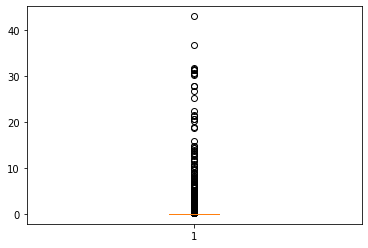

0.0


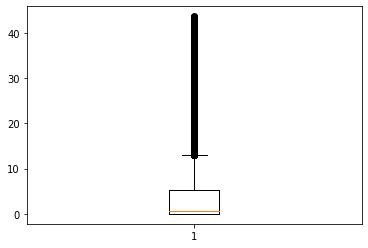

0.6


In [202]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2f_mou_8'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['loc_og_t2f_mou_8'])
plt.show()
print(np.median(churned_std_og_t2t['loc_og_t2f_mou_8']))
plt.boxplot(nonchurned_std_og_t2t['loc_og_t2f_mou_8'])
plt.show()
print(np.median(nonchurned_std_og_t2t['loc_og_t2f_mou_8']))

We can drop the columns corresponding to fixed lines of same ooperator as there is indeed not
much difference in estimates of outgoing calls to fixed lines within same operator

In [203]:
churn_dataset_filtered_train = churn_dataset_filtered_train.drop(['loc_og_t2f_mou_8','loc_og_t2f_mou_7','loc_og_t2f_mou_6'],axis = 1)

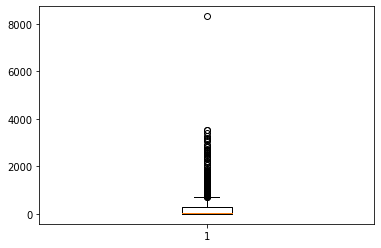

49.84


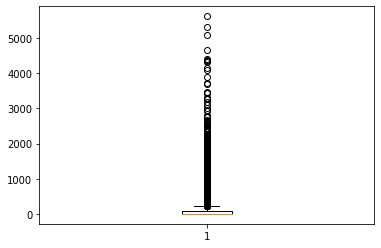

11.39


In [204]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2m_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2m_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2m_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2m_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2m_mou_6']))

Here we see indeed there is difference in median values of outgoing std calls to other operators
between those who have churned and those not churned

In [205]:
#We can impute missing values with the median for all outgoing std to other lines
cf = churn_dataset_filtered_train[churn_dataset_filtered_train['std_og_t2m_mou_6'].isna()]
#cf.shape
attributes = ['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


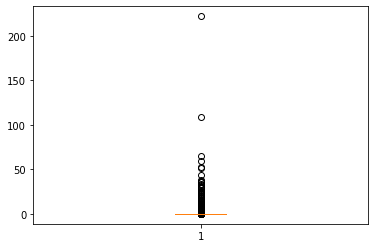

0.0


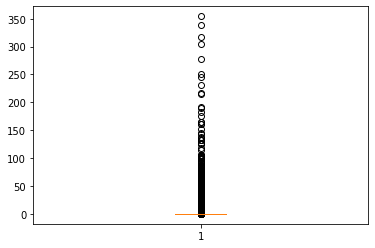

0.0


In [206]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['std_og_t2f_mou_6'].isna()]
churned_std_og_t2t = cf[cf['churn'] ==1]
nonchurned_std_og_t2t = cf[cf['churn'] ==0]
plt.boxplot(churned_std_og_t2t['std_og_t2f_mou_6'])
plt.show()
print(np.median(churned_std_og_t2t['std_og_t2f_mou_6']))
plt.boxplot(nonchurned_std_og_t2t['std_og_t2f_mou_6'])
plt.show()
print(np.median(nonchurned_std_og_t2t['std_og_t2f_mou_6']))

In [207]:
print(np.mean(nonchurned_std_og_t2t['std_og_t2f_mou_6']))
print(np.median(nonchurned_std_og_t2t['std_og_t2f_mou_6']))

2.343826906719595
0.0


Although the distribution of churn and not churn seems to be more or less similar there is slight difference in their mean.
We can consider this for our model and let model decide if the variable is significant

In [208]:
#We can do this for all months of std_t2f 6,7,8
attributes = ['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8']
churn_dataset_filtered_train = ImputeMedian(churn_dataset_filtered_train,attributes)

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


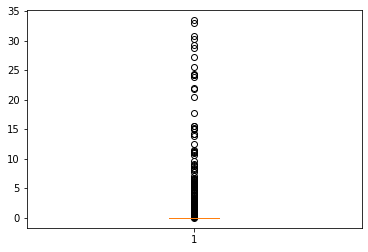

0.0
0.6361052631578942


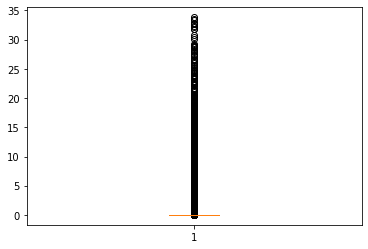

0.0
0.8319291481777817


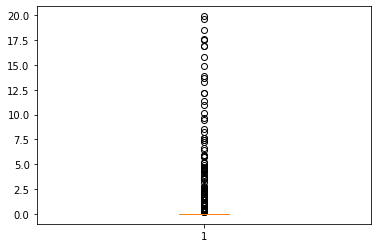

0.0
0.3364999999999999


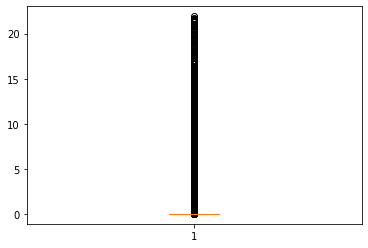

0.0
0.7007907179748285


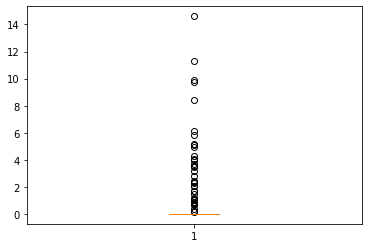

0.0
0.09266447368421052


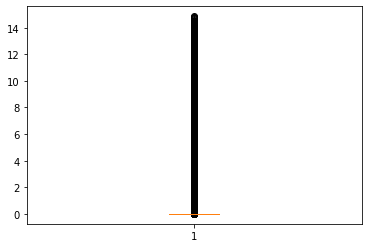

0.0
0.5611755292063719


In [218]:
attributes = ['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8']
BoxPlot(churn_dataset_filtered_train,attributes)
#churn_dataset_filtered_train.columns

In [ ]:
We can choose to drop these columns as there does not seem to have significant difference 
between 